# Step 1: Dataset Selection (Sample Stage)

In [ ]:
# Step 1: Install the Kaggle API
!pip install kaggle

# Step 2: Upload Kaggle API token
from google.colab import files
files.upload()  # Upload 'kaggle.json'

# Step 3: Move Kaggle token to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Search for datasets
!kaggle datasets list -s "Employee/HR Dataset"

# Step 5: Download a specific dataset
!kaggle datasets download -d ravindrasinghrana/employeedataset

# Step 6: Unzip the dataset
!unzip employeedataset.zip

# Step 7: Load the dataset
import pandas as pd
df = pd.read_csv('employee_data.csv')  # import the file name
print(df.head())


Saving kaggle.json to kaggle.json
ref                                                          title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ravindrasinghrana/employeedataset                            Employee/HR Dataset (All in One)                 520KB  2023-08-13 08:06:29          17720        140  1.0              
patelprashant/employee-attrition                             Employee Attrition                                50KB  2018-02-07 00:30:16          20367        155  0.8235294        
raminhuseyn/hr-analytics-data-set                            HR Analytics Data Set                            110KB  2024-04-18 18:47:20           2448         36  1.0              
colearninglounge/employee-attrition                     

Automated data Handling by using SweetWiz for dataset exploration and reporting

In [ ]:
!pip install sweetviz

import sweetviz as sv
from IPython.display import IFrame

# Generate the Sweetviz report
report = sv.analyze(df)  # Pass your DataFrame
report.show_html("sweetviz_report.html")  # Save the report

# Display the report inline in Colab
#IFrame(src='sweetviz_report.html', width=900, height=600)

from google.colab import files

# Download the Sweetviz report
files.download("sweetviz_report.html")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 18.7 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 2: Data Preprocessing (Modify Stage)

In [ ]:
# Install necessary libraries
!pip install pandas -q

# Import libraries
import pandas as pd
from datetime import datetime

# Load the previously downloaded dataset
raw_file_path = 'employee_data.csv'  # Use the existing dataset file
data = pd.read_csv(raw_file_path)

# Display basic information about the dataset
print("Raw Dataset Overview:")
print(data.info())
print("\nFirst few rows of the raw dataset:")
print(data.head())

# Step 1: Convert 'DOB' to Date Format
if 'DOB' in data.columns:
    # Convert 'DOB' to datetime format
    data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')

    # Check for missing values in 'DOB'
    print(f"Missing DOB values: {data['DOB'].isnull().sum()}")

    # Handle missing DOB values
    current_year = datetime.now().year

    # Create a flag for missing DOB values
    data['DOB_Missing'] = data['DOB'].isnull().astype(int)

    # Replace missing DOB with an approximate value based on average age
    avg_age = data['DOB'].dropna().apply(lambda dob: current_year - dob.year).mean()
    approx_dob = pd.to_datetime(f"{int(current_year - avg_age)}-01-01")  # Approximate DOB
    data['DOB'] = data['DOB'].fillna(approx_dob)

# Step 2: Convert 'StartDate' and 'ExitDate' to Date Format
date_columns = ['StartDate', 'ExitDate']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Step 3: Replace Null Values in 'ExitDate' and 'TerminationDescription'
if 'ExitDate' in data.columns:
    data['ExitDate'] = data['ExitDate'].fillna('Active')

if 'TerminationDescription' in data.columns:
    data['TerminationDescription'] = data['TerminationDescription'].fillna('Not Applicable')

# Step 4: Add New Columns (Age and Tenure)
if 'DOB' in data.columns:
    data['Age'] = data['DOB'].apply(lambda dob: current_year - dob.year if pd.notnull(dob) else None)

if 'StartDate' in data.columns:
    current_date = datetime.now()
    data['Tenure'] = data.apply(
        lambda row: (
            (current_date - row['StartDate']).days // 365 if row['ExitDate'] == 'Active' else
            (row['ExitDate'] - row['StartDate']).days // 365
        ) if pd.notnull(row['StartDate']) else None,
        axis=1
    )

# Step 5: Save the Cleaned Dataset
cleaned_file_path = 'employee_data_cleaned.csv'  # Adjusted to save locally in Colab environment
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

# Display basic info of the cleaned dataset
print("Cleaned Dataset Overview:")
print(data.info())
print("\nFirst few rows of the cleaned dataset:")
print(data.head())

Raw Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType           

<ipython-input-3-01f678598e21>:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-3-01f678598e21>:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')


Cleaned dataset saved to: employee_data_cleaned.csv
Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate                    3000 non-null   object        
 5   Title                       3000 non-null   object        
 6   Supervisor                  3000 non-null   object        
 7   ADEmail                     3000 non-null   object        
 8   BusinessUnit                3000 non-null   object        
 9   EmployeeStatus              3000 non-null   object        
 10  EmployeeType                3000 non-null 

# Step 4: Modeling (Model Stage)

1. Random Forest Classifier
2. CatBoost
3. LightGBM






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.





Training Random Forest...
Random Forest Accuracy: 0.81

Training CatBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



CatBoost Accuracy: 0.83

Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 102
[LightGBM] [Info] Start training from score -0.197435
[LightGBM] [Info] Start training from score -3.775891
[LightGBM] [Info] Start training from score -3.608837
[LightGBM] [Info] Start training from score -3.740173
[LightGBM] [Info] Start training from score -2.249835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.82

Model Accuracy Comparison:
Random Forest: 0.81
C

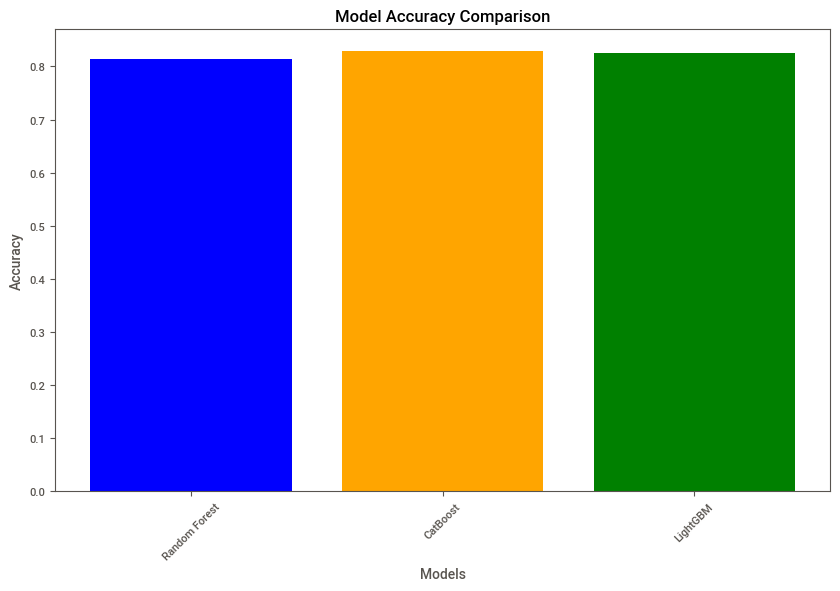

In [ ]:
!pip install catboost

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (update file path and target column name)
df = pd.read_csv('employee_data.csv')  # Replace with your dataset file
target_column = 'EmployeeStatus'  # Replace with the actual target column name

# Separate features and target
X = df.drop(columns=[target_column])  # Drop the target column
y = df[target_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Ensure training and testing features are numeric
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the train and test data to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Save results
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test_encoded, y_pred)
    }

# Compare model accuracies
print("\nModel Accuracy Comparison:")
for name, metrics in results.items():
    print(f"{name}: {metrics['Accuracy']:.2f}")

# Visualize model accuracy
model_accuracies = {name: metrics['Accuracy'] for name, metrics in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()


Hyperparameter optimization
Implementation of GridSearchCV : Optimization on Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                              scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
rf_grid_search.fit(X_train, y_train_encoded)

# Best parameters and accuracy
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Accuracy for Random Forest:", rf_grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.8220833333333334


Hyperparameter optimization
Implementation of GridSearchCV : Optimization on CatBoost

In [ ]:
from catboost import CatBoostClassifier

# Define the parameter grid for CatBoost
cat_param_grid = {
    'iterations': [200, 500],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize CatBoost model
cat_model = CatBoostClassifier(random_state=42, verbose=0)

# Initialize GridSearchCV
cat_grid_search = GridSearchCV(estimator=cat_model, param_grid=cat_param_grid,
                               scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
cat_grid_search.fit(X_train, y_train_encoded)

# Best parameters and accuracy
print("Best Parameters for CatBoost:", cat_grid_search.best_params_)
print("Best Accuracy for CatBoost:", cat_grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for CatBoost: {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best Accuracy for CatBoost: 0.82125


Hyperparameter optimization
Implementation of GridSearchCV : Optimization on LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# Define the parameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 10, 20]
}

# Initialize LightGBM model
lgb_model = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid,
                               scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
lgb_grid_search.fit(X_train, y_train_encoded)

# Best parameters and accuracy
print("Best Parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best Accuracy for LightGBM:", lgb_grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 8
[LightGBM] [Info] Start training from score -0.197435
[LightGBM] [Info] Start training from score -3.775891
[LightGBM] [Info] Start training from score -3.608837
[LightGBM] [Info] Start training from score -3.740173
[LightGBM] [Info] Start training from score -2.249835
Best Parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}
Best Accuracy for LightGBM: 0.82125


# Step 5: Model Evaluation (Assess Stage)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


Accuracy: 0.83
Precision: 0.78
Recall: 0.83
F1-Score: 0.79
AUC-ROC: 0.90
RMSE: 1.37


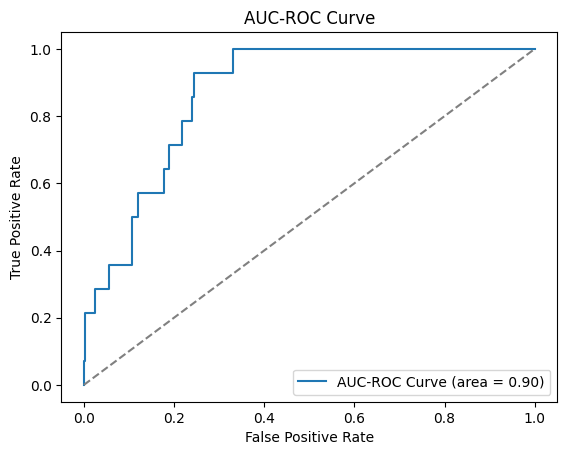

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, roc_curve
)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier

# Assuming CatBoost is already trained
catboost_model = models['CatBoost']  # Replace with your trained CatBoost model

# Ensure consistent label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)        # Encode testing labels

# Make predictions using the CatBoost model
y_pred = catboost_model.predict(X_test)

# Encode predictions if they are not numeric
if isinstance(y_pred[0], str):  # Check if predictions are strings
    y_pred_encoded = label_encoder.transform(y_pred)  # Encode predictions
else:
    y_pred_encoded = y_pred  # Already numeric

# Evaluate model performance
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))

# AUC-ROC
if hasattr(catboost_model, "predict_proba"):  # Ensure the model supports predict_proba
    y_pred_proba = catboost_model.predict_proba(X_test)

    if y_pred_proba.ndim > 1:  # Multi-class classification
        roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr')
    else:  # Binary classification
        roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
else:
    roc_auc = None
    print("CatBoost does not support probability predictions; skipping AUC-ROC computation.")

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
if roc_auc is not None:
    print(f"AUC-ROC: {roc_auc:.2f}")
print(f"RMSE: {rmse:.2f}")

# AUC-ROC Curve
if roc_auc is not None and y_pred_proba.ndim > 1:  # Multi-class classification
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba[:, 1], pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC-ROC Curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend(loc="lower right")
    plt.show()




Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for CatBoost
catboost_cv_scores = cross_val_score(catboost_model, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"CatBoost Cross-Validation Accuracy: {catboost_cv_scores.mean():.2f} (+/- {catboost_cv_scores.std():.2f})")

# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(models['Random Forest'], X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.2f} (+/- {rf_cv_scores.std():.2f})")

# Perform 5-fold cross-validation for LightGBM
lgbm_cv_scores = cross_val_score(models['LightGBM'], X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"LightGBM Cross-Validation Accuracy: {lgbm_cv_scores.mean():.2f} (+/- {lgbm_cv_scores.std():.2f})")


CatBoost Cross-Validation Accuracy: 0.83 (+/- 0.01)
Random Forest Cross-Validation Accuracy: 0.82 (+/- 0.00)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 90
[LightGBM] [Info] Start training from score -0.197435
[LightGBM] [Info] Start training from score -3.775891
[LightGBM] [Info] Start training from score -3.608837
[LightGBM] [Info] Start training from score -3.731439
[LightGBM] [Info] Start training from score -2.251813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

Ensemble Methods

**Stacking**
Combines predictions from multiple base models into a single meta-model to improve overall performance.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_estimators = [
    ('catboost', catboost_model),
    ('random_forest', models['Random Forest']),
    ('lightgbm', models['LightGBM'])
]

# Define stacking model
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train stacking model
stacking_model.fit(X_train, y_train_encoded)

# Evaluate stacking model
stacking_accuracy = stacking_model.score(X_test, y_test_encoded)
print(f"Stacking Model Accuracy: {stacking_accuracy:.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 714
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 102
[LightGBM] [Info] Start training from score -0.197435
[LightGBM] [Info] Start training from score -3.775891
[LightGBM] [Info] Start training from score -3.608837
[LightGBM] [Info] Start training from score -3.740173
[LightGBM] [Info] Start training from score -2.249835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with unde